# Data Augmentation

Data augmentation occurs when new data is created based on modifications of existing data. 

Data augmentation on images would include transformations like:

- Flipping the images either horizontally or vertically.
- Rotating the image.
- Cropping the image.
- varying the color on the image.

Check more on: [Deeplizard.com](https://deeplizard.com/learn/video/14syUbL16k4)

## Import Libraries

In [8]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialize Image plot Function


In [22]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## Image Pre-processing

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [25]:
# Now, let's choose a random image from the image we worked on on the previous work
chosen_image = random.choice(os.listdir("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/Animal_detection/cats-dogs-dataset/valid/dogs"))
img_path = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning/Animal_detection/cats-dogs-dataset/valid/dogs/" + chosen_image
assert os.path.isfile(img_path)

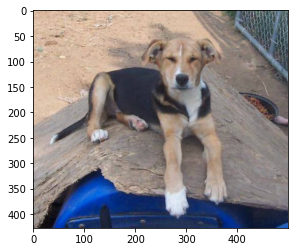

In [26]:
# obtain image by expanding the image dimensions
image = np.expand_dims(plt.imread(img_path), axis=0)
plt.imshow(image[0])

In [27]:
# Generate batches of augmented images from this imag
aug_iter = gen.flow(image)

In [28]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

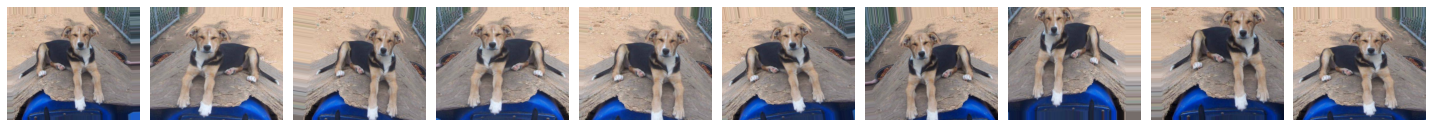

In [29]:
# Augmented images
plotImages(aug_images)

##  Save augmented data 

In [30]:
aug_iter = gen.flow(image, save_to_dir='/content/drive/MyDrive/Colab Notebooks/Deep_Learning/Data-Augmentation/', save_prefix='aug-image-', save_format='jpeg')